In [1]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# 2. Load the data
df = pd.read_csv('../data/complaints.csv')
print(f"Total records: {len(df)}")
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\user\AppData\Local\Temp\ipykernel_12088\3083808216.py:12: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/complaints.csv')


Total records: 9609797


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [2]:
# 3. Basic Info
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

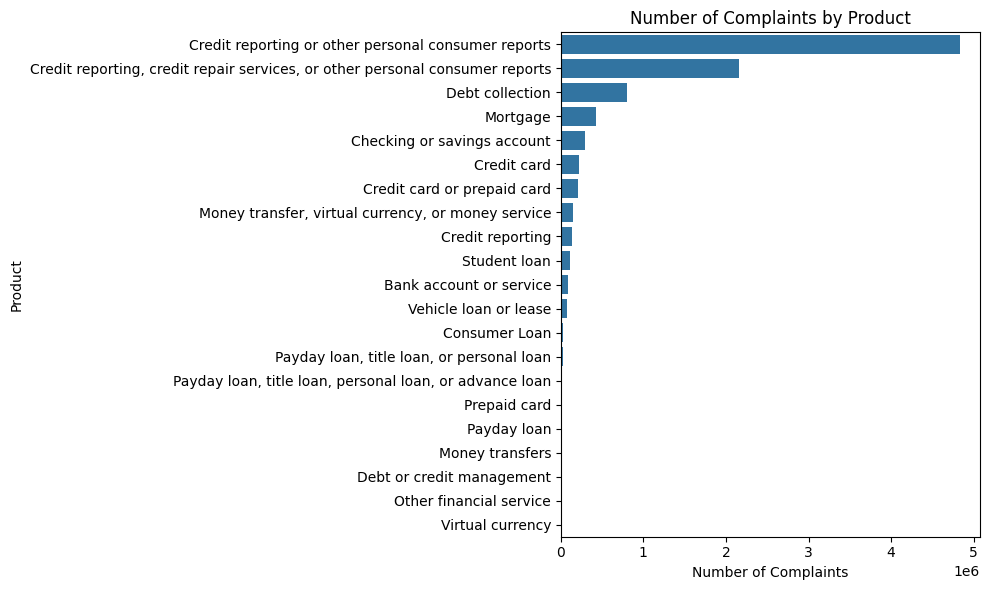

In [3]:
# 4. Distribution of Complaints per Product
product_counts = df['Product'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=product_counts.values, y=product_counts.index)
plt.title('Number of Complaints by Product')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


In [4]:
# 5. Length of Complaint Narratives
df['narrative_length'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(word_tokenize(x)))

plt.figure(figsize=(10, 6))
sns.histplot(df['narrative_length'], bins=50, kde=True)
plt.title('Distribution of Complaint Narrative Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Number of Complaints')
plt.tight_layout()
plt.show()

print("Shortest narrative:", df['narrative_length'].min())
print("Longest narrative:", df['narrative_length'].max())
print("Average narrative length:", round(df['narrative_length'].mean(), 2))


KeyboardInterrupt: 

In [5]:
# 6. Narratives Present vs Missing
has_narrative = df['Consumer complaint narrative'].notna().sum()
missing_narrative = df['Consumer complaint narrative'].isna().sum()

print(f"With narrative: {has_narrative}")
print(f"Without narrative: {missing_narrative}")


With narrative: 2980756
Without narrative: 6629041


In [ ]:
# 7. Filter for required products
target_products = [
    "Credit card", 
    "Personal loan", 
    "Buy Now, Pay Later (BNPL)", 
    "Savings account", 
    "Money transfers"
]

# Note: product names may differ in dataset, check for close matches
df['Product'].unique()  # inspect if "Buy Now, Pay Later (BNPL)" exists as-is

# Optional: fuzzy matching if needed (can be added later)

filtered_df = df[df['Product'].isin(target_products)]
filtered_df = filtered_df.dropna(subset=['Consumer complaint narrative'])

print(f"Records after filtering: {len(filtered_df)}")


In [ ]:
# 8. Text Cleaning Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)  # remove line breaks
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    # Optional: remove common boilerplate (simple example)
    boilerplate_phrases = [
        "i am writing to", "i want to file", "this is a complaint", "i’m writing regarding"
    ]
    for phrase in boilerplate_phrases:
        text = text.replace(phrase, "")
    return text

filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)


In [ ]:
# 9. Save Cleaned Data
output_path = '../data/filtered_complaints.csv'
os.makedirs('../data', exist_ok=True)
filtered_df.to_csv(output_path, index=False)
print(f"Saved cleaned dataset to: {output_path}")
